* A - ширина пьедестала
* P - высота пьедестала в кПа
* unstable_mode - тор. номер наиболее неустойчивой моды
* growth - инкремент в обратных альфвеновских временах

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

In [2]:
filename = "output-data_triangularity=1.8e-1.npz" #  "output-data_triangularity=1.8e-1.npz"

data = np.load(f'data/{filename}')

In [3]:
# Используем регулярное выражение для поиска числа в формате с плавающей точкой
match = re.search(r"triangularity=([+-]?[0-9]*\.?[0-9]+(?:[eE][+-]?[0-9]+)?)[^0-9]", filename)

if match:
    triangularity = float(match.group(1))
    print("Current triangularity:", triangularity)
else:
    print("Число не найдено")

Current triangularity: 0.18


In [4]:
lst = data.files
print(lst)
for item in lst:
    print(item)
    print(data[item])

['delta_arr', 'p_multy_arr', 'growth', 'unstable_mode']
delta_arr
[0.01       0.01578947 0.02157895 0.02736842 0.03315789 0.03894737
 0.04473684 0.05052632 0.05631579 0.06210526 0.06789474 0.07368421
 0.07947368 0.08526316 0.09105263 0.09684211 0.10263158 0.10842105
 0.11421053 0.12      ]
p_multy_arr
[0.1     0.18947 0.27895 0.36842 0.45789 0.54737 0.63684 0.72632 0.81579
 0.90526 0.99474 1.08421 1.17368 1.26316 1.35263 1.44211 1.53158 1.62105
 1.71053 1.8    ]
growth
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.02602816 0.03467146 0.04120706 0.04654792 0.05104115 0.05500492
  0.0585672  0.06161022 0.06403061 0.06591112 0.06740418 0.06651573
  0.10617081 0.13668238 0.17532265 0.18887663 0.20039755 0.21375158
  0.23119163 0.25744293]
 [0.02374963 0.03174202 0.03771529 0.04261976 0.04681181 0.05046627
  0.0537095  0.05663618 

#### NPZ list items:
* delta_ar
* p_multy_arr
* growth
* unstable_mode

In [5]:
N, M = data["growth"].shape

In [6]:
data_arr = []
for i in range(N):
    for j in range(M):
        data_arr.append([data["delta_arr"][i], data["p_multy_arr"][j], data["growth"][i, j], data["unstable_mode"][i, j]])

df_2 = pd.DataFrame(data_arr, columns=['A', 'P', 'growth', 'unstable_mode'])

In [7]:
np_growth = df_2.growth.to_numpy()
growth_edge = 0.1
zero_mask = abs(np_growth - growth_edge) < np_growth.std() / 4
plot_data = df_2.to_numpy()[zero_mask, :]

plot_x = [plot_data[0, 0]]
plot_y = [plot_data[0, 1]]
plot_z = [plot_data[0, 2]]
n_of_same_x = 1
for x, y, z in plot_data[1:, :3]:
    if x == plot_x[-1]:
        plot_y[-1] += y
        plot_z[-1] += z
        n_of_same_x += 1
    else:
        plot_y[-1] /= n_of_same_x
        plot_z[-1] /= n_of_same_x

        plot_x.append(x)
        plot_y.append(y)
        plot_z.append(z)
        n_of_same_x = 1

plot_y[-1] /= n_of_same_x
plot_z[-1] /= n_of_same_x
# plot_data = df_2.to_numpy()[zero_mask, :]

In [8]:
print(np_growth.std())

0.057214354090491575


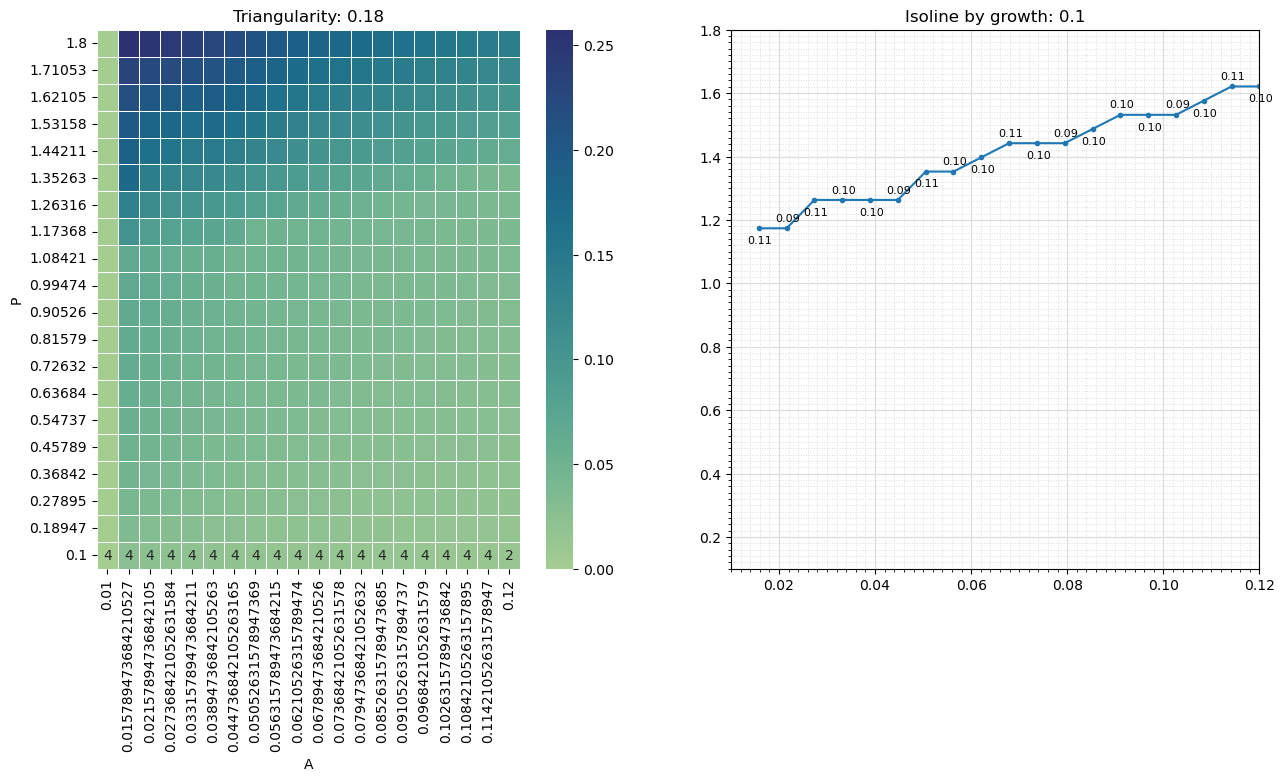

In [9]:
fig, [ax1, ax2] = plt.subplots(ncols=2)
fig.set_figwidth(15)
fig.set_figheight(7)

table = df_2.pivot(index='P', columns='A', values='growth')
annot_arr = data["unstable_mode"][1:, 1:]
# annot_arr[zero_mask] = -1
# print(table.shape, annot_arr.shape)

sns.heatmap(table, cmap="crest", annot=annot_arr.T, linewidth=.5, ax=ax1)
ax1.invert_yaxis()

# ax2.plot(plot_data[:, 0], plot_data[:, 1], marker="+", label='Direct', alpha=0.8)
# for i, (xi, yi) in enumerate(zip(plot_data[:, 0], plot_data[:, 1])):
#     ax2.annotate(f"{plot_data[i, 2]:.2f}",  # Текст аннотации
#                  (xi, yi),                # Координаты точки
#                  textcoords="offset points",  # Смещение текста
#                  fontsize=8,
#                  xytext=(-8, 5))

ax2.plot(plot_x, plot_y, marker=".")  # , label='Average', alpha=0.8, linewidth=.5
for i, (xi, yi) in enumerate(zip(plot_x, plot_y)):
    ax2.annotate(f"{plot_z[i]:.2f}",  # Текст аннотации
                 (xi, yi),                # Координаты точки
                 textcoords="offset points",  # Смещение текста
                 fontsize=8,
                 xytext=(-8, (5 if i%2 else -11)))

# ax2.legend()
ax2.set_xlim([df_2.A.min(), df_2.A.max()])
ax2.set_ylim([df_2.P.min(), df_2.P.max()])

ax2.grid(which='major', color='#DDDDDD', linewidth=0.9)
ax2.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.7)
ax2.minorticks_on()
ax2.xaxis.set_minor_locator(AutoMinorLocator(10))
ax2.yaxis.set_minor_locator(AutoMinorLocator(10))

ax1.set_title(f"Triangularity: {triangularity}")
ax2.set_title(f"Isoline by growth: {growth_edge}")

plt.show()

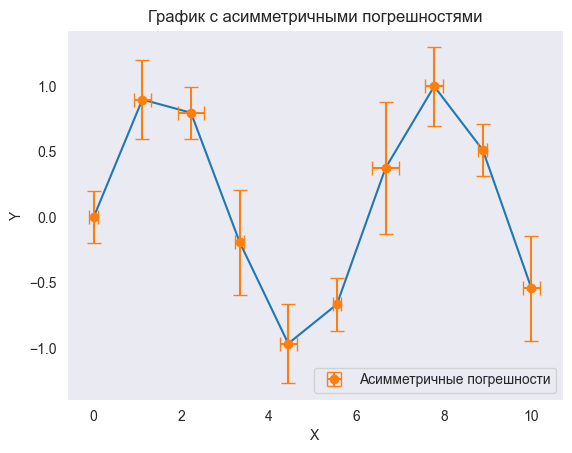

In [137]:
x = np.linspace(0, 10, 10)
y = np.sin(x)  # Значения функции

x_error = [0.1, 0.2, 0.3, 0.1, 0.2, 0.1, 0.3, 0.2, 0.1, 0.2]
y_error = [0.2, 0.3, 0.2, 0.4, 0.3, 0.2, 0.5, 0.3, 0.2, 0.4]

plt.plot(x,y)
plt.errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o', capsize=5, label='Асимметричные погрешности')
plt.title("График с асимметричными погрешностями")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()